# Payment Date Prediction 


### Importing related Libraries 

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Highradius/dataset.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Check the shape of the dataframe


In [7]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [9]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [10]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [11]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [12]:
df.isnull().sum()/len(df)*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [13]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [14]:
def similar(x):
    if x['baseline_create_date'] == 1 and x['document_create_date'] == 1 and x['document_create_date.1'] == 1:
        return 1
    

#### Please check, Column 'posting_id' is constant columns or not


In [15]:
df.posting_id.value_counts()

1.0    50000
Name: posting_id, dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [16]:
df.isOpen.value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [17]:
df=df.drop(columns=['area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1'])




### Please check from the dataframe whether all the columns are removed or not 

In [18]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


### Show all the Duplicate rows from the dataframe

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Display the Number of Duplicate Rows

In [20]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [21]:
df.drop_duplicates(keep='first',inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [22]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


### Check for the number of Rows and Columns in your dataset

In [23]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [24]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [25]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [26]:
 df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [27]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])

### Please check the datatype of all the columns after conversion of the above 4 columns

In [28]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [29]:
df['invoice_currency'].value_counts()[['USD','CAD']]


USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [30]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [31]:
def cad_to_usd(current_col, amount):
    if current_col == 'CAD':
        return amount*0.7
    else:
        return amount
    
df['converted_usd'] = df.apply(lambda x : cad_to_usd(x.invoice_currency,x.total_open_amount), axis=1)

### Display the new "converted_usd" column values

In [32]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [33]:
df.sort_values(by="buisness_year",inplace=True)

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [34]:
df=df.drop(columns=['invoice_currency','total_open_amount'])



### Write a code to check the number of columns in dataframe

In [35]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [36]:
df[df.columns[df.isna().any()]]

,clear_date
24693,2019-03-27
30055,2019-05-21
30056,2019-05-20
30057,2019-11-01
30058,2019-01-29
...,...
11258,2020-01-22
11261,NaT
33206,NaT
33217,NaT


#### Find out the number of null values from the column that you got from the above code

In [37]:
df['clear_date'].isnull().sum()


9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [38]:
maindata = df[pd.notnull(df['clear_date'])]
nulldata  = df[pd.isnull(df['clear_date'])]

### Check the number of Rows and Columns for both the dataframes 

In [39]:
maindata.shape

(39158, 11)

In [40]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [41]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
24693,U001,0200707005,KING S co,2019-03-27,2019.0,1.928933e+09,2019-03-12,2019-03-27,2019-03-12,NAA8,8195.840
30055,CA02,0140104440,SO foundation,2019-05-21,2019.0,2.960546e+09,2019-05-03,2019-05-13,2019-05-03,CA10,56644.168
30056,U001,0200750051,ALBER llc,2019-05-20,2019.0,1.929249e+09,2019-05-03,2019-05-18,2019-05-03,NAA8,84027.270
30057,U001,CCU013,KRAFT F us,2019-11-01,2019.0,1.929915e+09,2019-09-28,2019-09-28,2019-09-28,NAX2,31739.220
30058,U001,0200749225,SUPER associates,2019-01-29,2019.0,1.928618e+09,2019-01-14,2019-01-29,2019-01-14,NAA8,25542.560


In [42]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
5648,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,49226.33
900,U001,CCU013,KRAFT F in,NaT,2020.0,1.930570e+09,2020-02-28,2020-02-28,2020-02-28,NAX2,37209.64
41422,U001,0200762301,C&S WH systems,NaT,2020.0,1.930706e+09,2020-03-26,2020-04-10,2020-03-26,NAC6,45071.13
41360,U001,0200711029,WEGMAN foundation,NaT,2020.0,1.930789e+09,2020-04-17,2020-05-02,2020-04-17,NAA8,63388.07
48716,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930881e+09,2020-05-09,2020-05-24,2020-05-09,NAH4,6185.93


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [43]:
maindata['Delay']= maindata['clear_date']- maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [44]:
avg_delay= maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay.head()

name_customer
11078 us             17 days
17135 associates    -10 days
17135 llc            -3 days
236008 associates    -3 days
99 CE                 2 days
Name: Delay, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [45]:
maindata['avg_delay']=maindata['name_customer'].map(avg_delay)
maindata['avg_delay']

24693               0 days 09:00:00
30055     4 days 22:51:25.714285714
30056     0 days 13:05:27.272727272
30057    39 days 09:52:56.470588235
30058               3 days 00:00:00
                    ...            
11253   -1 days +08:36:31.304347827
11255             -1 days +12:00:00
33212   -2 days +01:03:13.170731708
11258     2 days 06:51:25.714285714
0       -3 days +07:08:49.779837776
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [46]:
maindata['avg_delay']=maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [47]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
24693,U001,0200707005,KING S co,2019-03-27,2019.0,1.928933e+09,2019-03-12,2019-03-27,2019-03-12,NAA8,8195.840,0 days,3.240000e+04
30055,CA02,0140104440,SO foundation,2019-05-21,2019.0,2.960546e+09,2019-05-03,2019-05-13,2019-05-03,CA10,56644.168,8 days,4.278857e+05
30056,U001,0200750051,ALBER llc,2019-05-20,2019.0,1.929249e+09,2019-05-03,2019-05-18,2019-05-03,NAA8,84027.270,2 days,4.712727e+04
30057,U001,CCU013,KRAFT F us,2019-11-01,2019.0,1.929915e+09,2019-09-28,2019-09-28,2019-09-28,NAX2,31739.220,34 days,3.405176e+06
30058,U001,0200749225,SUPER associates,2019-01-29,2019.0,1.928618e+09,2019-01-14,2019-01-29,2019-01-14,NAA8,25542.560,0 days,2.592000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,U001,0200794332,COST systems,2020-03-05,2020.0,1.930543e+09,2020-02-20,2020-03-06,2020-02-20,NAAX,48451.410,-1 days,-5.540870e+04
11255,U001,0200779111,NICH trust,2020-01-31,2020.0,1.930393e+09,2020-01-15,2020-01-30,2020-01-15,NAA8,40303.400,1 days,-4.320000e+04
33212,U001,0200769623,WAL-MAR associates,2020-03-10,2020.0,1.930565e+09,2020-02-25,2020-03-11,2020-02-25,NAH4,4726.630,-1 days,-1.690068e+05
11258,U001,0200772670,ASSOCIAT associates,2020-01-22,2020.0,1.930362e+09,2020-01-06,2020-01-21,2020-01-06,NAU5,60088.900,1 days,1.974857e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [48]:
maindata.drop(['Delay','clear_date'], inplace=True,axis=1)


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [49]:
X = maindata.drop('avg_delay',axis=1)

In [50]:
y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [52]:
X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape

((23494, 10), (15664, 10), (23494,), (15664,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=1)

### Please check for the number of rows and columns of all the 4 dataframes 

In [54]:
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((7832, 10), (7832, 10), (7832,), (7832,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

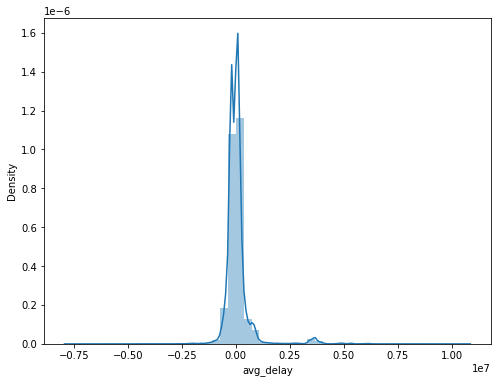

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax=sns.distplot(y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [56]:
cust_name_doc_id = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

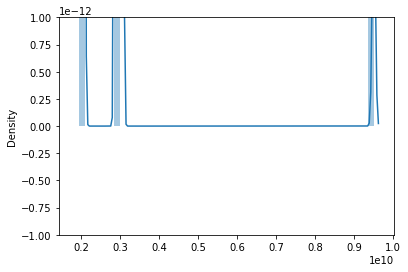

In [57]:
sns.distplot(x=X_train['doc_id'])


#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


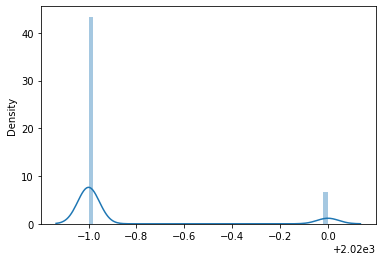

In [58]:
sns.distplot(x=X_train['buisness_year'])

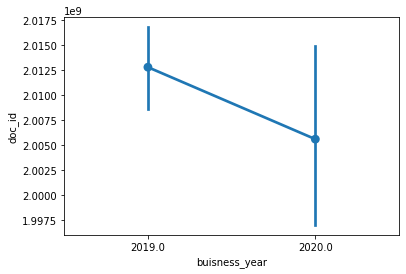

In [59]:
sns.pointplot(x=X_train['buisness_year'],y=X_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [60]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
21500,U001,0200936373,SUPE llc,2020.0,1.930449e+09,2020-01-28,2020-02-12,2020-01-28,NAA8,25959.21
29961,U001,0200769623,WAL-MAR associates,2019.0,1.930097e+09,2019-11-03,2019-11-18,2019-11-03,NAH4,943.12
44776,U001,0100051641,VIT,2019.0,1.929027e+09,2019-03-27,2019-05-31,2019-03-27,NAGD,30.65
22905,U001,0200726979,BJ'S us,2019.0,1.928678e+09,2019-01-24,2019-02-08,2019-01-24,NAA8,889.88
35486,U001,200769623,WAL-MAR,2019.0,1.928949e+09,2019-03-13,2019-03-28,2019-03-13,NAH4,15050.86
...,...,...,...,...,...,...,...,...,...,...
26214,U001,0200769623,WAL-MAR llc,2019.0,1.929519e+09,2019-06-20,2019-07-05,2019-06-20,NAH4,33151.66
20027,U001,0200707822,PUBLI,2019.0,1.928709e+09,2019-01-31,2019-02-15,2019-01-31,NAA8,119834.97
22854,U001,CCU002,KRFT FDS,2019.0,1.930097e+09,2019-11-08,2019-12-13,2019-11-08,NAG2,63185.27
44234,U001,0200769623,WAL-MAR llc,2019.0,1.929738e+09,2019-08-13,2019-08-28,2019-08-13,NAH4,490.32


In [61]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132289,2.011831e+09,30336.207996
std,0.338812,2.959927e+08,35585.780131
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929181e+09,4490.610000
50%,2019.000000,1.929727e+09,16777.500000
75%,2019.000000,1.930207e+09,44961.580000
max,2020.000000,9.500000e+09,545359.560000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [62]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [63]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [64]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [65]:
X_train[['business_code','business_code_enc']]


,business_code,business_code_enc
21500,U001,1
29961,U001,1
44776,U001,1
22905,U001,1
35486,U001,1
...,...,...
26214,U001,1
20027,U001,1
22854,U001,1
44234,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [66]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [67]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [68]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [69]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [70]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [71]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [72]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [73]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [74]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [75]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [76]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [77]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [79]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [80]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [81]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [83]:
X_train.dtypes,X_test.dtypes,X_val.dtypes

(cust_number                 int64
 buisness_year             float64
 doc_id                    float64
 converted_usd             float64
 business_code_enc           int64
 name_customer_enc           int64
 cust_payment_terms_enc      int64
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 year_of_createdate          int64
 day_of_due                  int64
 month_of_due                int64
 year_of_due                 int64
 dtype: object, cust_number                 int64
 buisness_year             float64
 doc_id                    float64
 converted_usd             float64
 business_code_enc           int64
 name_customer_enc           int64
 cust_payment_terms_enc      int64
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 year

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [84]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [85]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [86]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [87]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [88]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'month_of_createdate',
 'year_of_due',
 'year_of_postingdate',
 'day_of_createdate',
 'year_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

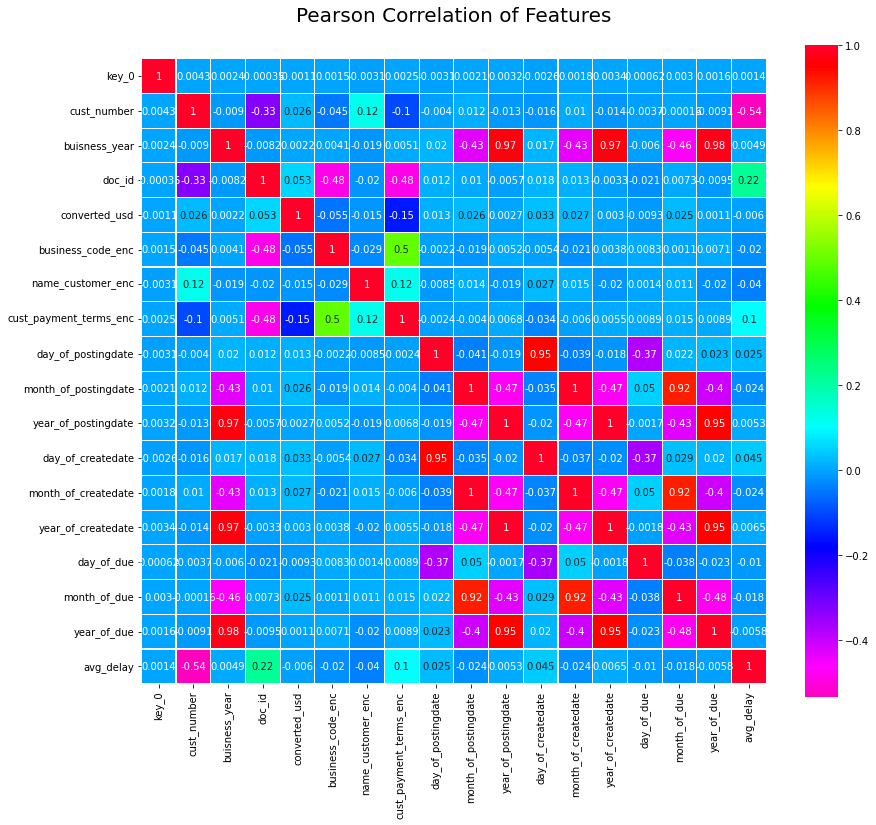

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [90]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [91]:
sel.variances_

array([1.76777469e+15, 1.14788690e-01, 8.76079672e+16, 1.26629385e+09,
       2.83362176e-01, 1.07317322e+06, 1.35937773e+02, 7.62876872e+01,
       1.22915387e+01, 1.15150068e-01, 7.81323898e+01, 1.22968988e+01,
       1.15171584e-01, 7.61708117e+01, 1.20982683e+01, 1.18287576e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [92]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

575697.8019086078

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[285693600054.26953],[0.3861154687183599],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

682902.6593894946

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[285693600054.26953, 470562339245.4031],[0.3861154687183599, -0.01112149873705004],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

495666.6824876582

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression'],[285693600054.26953, 470562339245.4031, 155480280152.6173],[0.3861154687183599, -0.01112149873705004, 0.6659115258903359],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regression')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

393884.85136771

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'],[285693600054.26953, 470562339245.4031, 155480280152.6173, 97786955309.86816],[0.3861154687183599, -0.01112149873705004, 0.6659115258903359, 0.7898801400715522],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [109]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[10:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

412176.3575042289

### Display The Comparison Lists


In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[285693600054.26953, 470562339245.4031, 155480280152.6173, 97786955309.86816, 121435361812.31111],[0.3861154687183599, -0.01112149873705004, 0.6659115258903359, 0.7898801400715522, 0.739065592813398],

## You need to make the comparison list into a comparison dataframe 

In [113]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)),
columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.856936e+11,0.386115
1,Support Vector Regression,4.705623e+11,-0.011121
2,Decision Tree Regression,1.554803e+11,0.665912
3,Random Forest Regression,9.778696e+10,0.789880
4,XGB Regressor,1.214354e+11,0.739066


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [114]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[10:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [115]:
mean_squared_error(y_test,predictedfinal,squared=False)

348475.7693331218

### Calculate the mean Square Error for validation dataset

In [116]:
mean_squared_error(y_val,predict_testfinal,squared=False)

412176.3575042289

### Calculate the R2 score for test

In [117]:
r2_score(y_test,predictedfinal)

0.739065592813398

### Calculate the R2 score for Validation

In [118]:
r2_score(y_val,predict_testfinal)

0.6325539985637696

### Calculate the Accuracy for train Dataset 

In [119]:
regressorfinal.score(X_train, y_train)

0.7379888280826078

### Calculate the accuracy for validation

In [120]:
regressorfinal.score(X_val, y_val)

0.6325539985637696

### Calculate the accuracy for test

In [121]:
regressorfinal.score(X_test, y_test)

0.739065592813398

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [122]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
5648,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,49226.330
900,U001,CCU013,KRAFT F in,NaT,2020.0,1.930570e+09,2020-02-28,2020-02-28,2020-02-28,NAX2,37209.640
41422,U001,0200762301,C&S WH systems,NaT,2020.0,1.930706e+09,2020-03-26,2020-04-10,2020-03-26,NAC6,45071.130
41360,U001,0200711029,WEGMAN foundation,NaT,2020.0,1.930789e+09,2020-04-17,2020-05-02,2020-04-17,NAA8,63388.070
48716,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930881e+09,2020-05-09,2020-05-24,2020-05-09,NAH4,6185.930
...,...,...,...,...,...,...,...,...,...,...,...
11254,U001,0200762301,C&S WH,NaT,2020.0,1.930860e+09,2020-05-07,2020-05-22,2020-05-07,NAC6,93460.650
11257,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930652e+09,2020-03-15,2020-03-30,2020-03-15,NAH4,14165.840
11261,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930662e+09,2020-03-19,2020-04-03,2020-03-19,NAH4,3270.040
33206,CA02,0140104440,SO in,NaT,2020.0,2.960624e+09,2020-03-30,2020-04-11,2020-04-01,CA10,28202.279


### Check for the number of rows and columns in the nulldata

In [123]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [124]:
nulldata.describe()
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 5648 to 33217
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [125]:
nulldata1 = nulldata.copy(deep = True)

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [126]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [127]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [128]:
nulldata['day_of_cleardate'] = None
nulldata['month_of_cleardate'] = None
nulldata['year_of_cleardate'] = None

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [129]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [130]:
nulldata.dtypes


business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                  object
month_of_cleardate                object
year_of_cleardate                 object
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [131]:
nulldata.drop(['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate',
'year_of_cleardate'], inplace = True, axis = 1)

### Check the information of the "nulldata" dataframe

In [132]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 5648 to 33217
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_createdate       9681 non-null   int64  
 9   month_of_createdate     9681 non-null   int64  
 10  year_of_createdate      9681 non-null   int64  
 11  day_of_due              9681 non-null   int64  
 12  month_of_due            9681 non-null   int64  
 13  year_of_due             9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-nul

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 31857 to 44373
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int64  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int64  
 5   name_customer_enc       7832 non-null   int64  
 6   cust_payment_terms_enc  7832 non-null   int64  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [134]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [135]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_createdate', 'month_of_createdate',
       'year_of_createdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [136]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [137]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
5648,200769623,2020.0,1.930843e+09,49226.330,67,2984,34,1,5,2020,1,5,2020,16,5,2020
900,2013,2020.0,1.930570e+09,37209.640,67,1533,66,28,2,2020,28,2,2020,28,2,2020
41422,200762301,2020.0,1.930706e+09,45071.130,67,441,26,26,3,2020,26,3,2020,10,4,2020
41360,200711029,2020.0,1.930789e+09,63388.070,67,3015,20,17,4,2020,17,4,2020,2,5,2020
48716,200769623,2020.0,1.930881e+09,6185.930,67,2984,34,9,5,2020,9,5,2020,24,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,200762301,2020.0,1.930860e+09,93460.650,67,433,26,7,5,2020,7,5,2020,22,5,2020
11257,200769623,2020.0,1.930652e+09,14165.840,67,2984,34,15,3,2020,15,3,2020,30,3,2020
11261,200769623,2020.0,1.930662e+09,3270.040,67,2990,34,19,3,2020,19,3,2020,3,4,2020
33206,140104440,2020.0,2.960624e+09,28202.279,67,2561,5,30,3,2020,1,4,2020,11,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [138]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [139]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [140]:
final_result

0       1.093472e+05
1       3.619504e+06
2      -1.876449e+04
3       3.020416e+05
4       1.131342e+05
            ...     
9676   -1.876449e+04
9677    1.131342e+05
9678    1.131342e+05
9679    4.276960e+05
9680    2.513485e+05
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [141]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [142]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,5648,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,49226.330,1.093472e+05
1,900,U001,CCU013,KRAFT F in,NaT,2020.0,1.930570e+09,2020-02-28,2020-02-28,2020-02-28,NAX2,37209.640,3.619504e+06
2,41422,U001,0200762301,C&S WH systems,NaT,2020.0,1.930706e+09,2020-03-26,2020-04-10,2020-03-26,NAC6,45071.130,-1.876449e+04
3,41360,U001,0200711029,WEGMAN foundation,NaT,2020.0,1.930789e+09,2020-04-17,2020-05-02,2020-04-17,NAA8,63388.070,3.020416e+05
4,48716,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930881e+09,2020-05-09,2020-05-24,2020-05-09,NAH4,6185.930,1.131342e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,11254,U001,0200762301,C&S WH,NaT,2020.0,1.930860e+09,2020-05-07,2020-05-22,2020-05-07,NAC6,93460.650,-1.876449e+04
9677,11257,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930652e+09,2020-03-15,2020-03-30,2020-03-15,NAH4,14165.840,1.131342e+05
9678,11261,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930662e+09,2020-03-19,2020-04-03,2020-03-19,NAH4,3270.040,1.131342e+05
9679,33206,CA02,0140104440,SO in,NaT,2020.0,2.960624e+09,2020-03-30,2020-04-11,2020-04-01,CA10,28202.279,4.276960e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [143]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [144]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [145]:
Final['clear_date']

0      2020-05-17 06:22:27.226562500
1      2020-04-09 21:25:04.000000000
2      2020-04-09 18:47:15.505859375
3      2020-05-05 11:54:01.562500000
4      2020-05-25 07:25:34.242187500
                    ...             
9676   2020-05-21 18:47:15.505859375
9677   2020-03-31 07:25:34.242187500
9678   2020-04-04 07:25:34.242187500
9679   2020-04-15 22:48:16.000000000
9680   2020-04-24 21:49:08.531250000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [146]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [147]:
Final['avg_delay']

0        1.0
1       41.0
2       -1.0
3        3.0
4        1.0
        ... 
9676    -1.0
9677     1.0
9678     1.0
9679     4.0
9680     2.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [148]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [149]:
Final.drop(['key_0','avg_delay'], inplace = True, axis = 1)

### Display the count of each categoty of new "Aging Bucket" column 

In [150]:
Final['Aging Bucket'].value_counts()

0-15               7737
31-45                70
16-30                17
Greatar than 60       3
46-60                 2
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [151]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,U001,0200769623,WAL-MAR associates,2020-05-17 06:22:27.226562500,2020.0,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,49226.330,0-15
1,U001,CCU013,KRAFT F in,2020-04-09 21:25:04.000000000,2020.0,1.930570e+09,2020-02-28,2020-02-28,2020-02-28,NAX2,37209.640,31-45
2,U001,0200762301,C&S WH systems,2020-04-09 18:47:15.505859375,2020.0,1.930706e+09,2020-03-26,2020-04-10,2020-03-26,NAC6,45071.130,NaN
3,U001,0200711029,WEGMAN foundation,2020-05-05 11:54:01.562500000,2020.0,1.930789e+09,2020-04-17,2020-05-02,2020-04-17,NAA8,63388.070,0-15
4,U001,200769623,WAL-MAR associates,2020-05-25 07:25:34.242187500,2020.0,1.930881e+09,2020-05-09,2020-05-24,2020-05-09,NAH4,6185.930,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200762301,C&S WH,2020-05-21 18:47:15.505859375,2020.0,1.930860e+09,2020-05-07,2020-05-22,2020-05-07,NAC6,93460.650,NaN
9677,U001,0200769623,WAL-MAR associates,2020-03-31 07:25:34.242187500,2020.0,1.930652e+09,2020-03-15,2020-03-30,2020-03-15,NAH4,14165.840,0-15
9678,U001,0200769623,WAL-MAR llc,2020-04-04 07:25:34.242187500,2020.0,1.930662e+09,2020-03-19,2020-04-03,2020-03-19,NAH4,3270.040,0-15
9679,CA02,0140104440,SO in,2020-04-15 22:48:16.000000000,2020.0,2.960624e+09,2020-03-30,2020-04-11,2020-04-01,CA10,28202.279,0-15


### Store this dataframe into the .csv format

In [153]:
Final.to_csv('/content/drive/MyDrive/Highradius/19th_April',index=False)

# END OF THE PROJECT